# Exercise 7: Global warming in the Netherlands?


The Dutch KNMI organization measures, among others, the temperature in the Netherlands. Complete datasets of recorded temperatures are available via https://www.knmi.nl/nederland-nu/klimatologie-metingen-en-waarnemingen . Of particular interest for this exercise in the 'average' temperature per month since 1906 corrected for changes in the location of stations and methods of measurement. See http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt for more background information on these measurements. 

The data can be used as input for climate models and is available online as https://climexp.knmi.nl/data/tcnt_v11.dat 

In this exercise we will use the advanced pandas library to handle the data. The fastest way to deal with this library is via the cookbook https://pandas.pydata.org/pandas-docs/stable/cookbook.html

It is not necessary to download the datafile it can be read directly from the internet using the pandas read_csv fucntion.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# This is the link to the old CNT file. The file is empty and contains only a header with column names
# Most likely the file will go offline at some point. To avoid further issues I define the column names

header=pd.read_csv('https://cdn.knmi.nl/knmi/asc/klimatologie/onderzoeksgegevens/CNT/tg_CNT.txt', 
                   skiprows=11, delimiter='\s+')
header.columns=header.columns.str.strip(',') #remove the strange comma from the column names
print(header.columns)

column_names = ['YEAR', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']

Index(['YEAR', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')


In [3]:
# The new header does not contain column names. 
df=pd.read_csv('https://climexp.knmi.nl/data/tcnt_v11.dat', skiprows=8, delimiter='\s+', header=None)
# Below is a backup of the file from February 2025 that is available via github 
# df=pd.read_csv('https://mdedood.github.io/RS-BP/python/tcnt_v11.dat', skiprows=8, delimiter='\s+', header=None) 
df.columns=column_names # This overwrites the column names with something that makes sense
df.head()

,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1906,3.29,2.28,3.79,7.67,12.41,14.17,16.79,17.00,13.35,11.65,7.50,-0.28
1,1907,1.48,0.41,4.60,7.43,12.49,13.52,13.90,15.55,13.79,11.24,5.58,3.09
2,1908,-1.25,3.29,3.44,5.89,12.98,16.22,16.65,15.08,13.43,9.78,4.23,0.97
3,1909,0.54,0.30,2.97,8.55,11.30,12.94,14.58,16.31,13.02,10.95,3.89,3.01
4,1910,3.26,4.03,5.26,7.84,12.43,16.00,15.15,16.22,13.35,10.38,3.31,5.34


## Example: plotting the average temperature for the month January

The dataset starts at 1906 and you can easily plot this data by calling the appropriate column from the pandas dataframe. I called the dataframe 'df' and call the data for the x-axis as 'df['YEAR']' and the y-column as 'df['Jan']' to create a plot of the average temperature for the month January from 1906 until now.

In [4]:
# plot settings 

import matplotlib.pyplot as plt
%matplotlib inline 

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

Text(0, 0.5, 'Temperature')

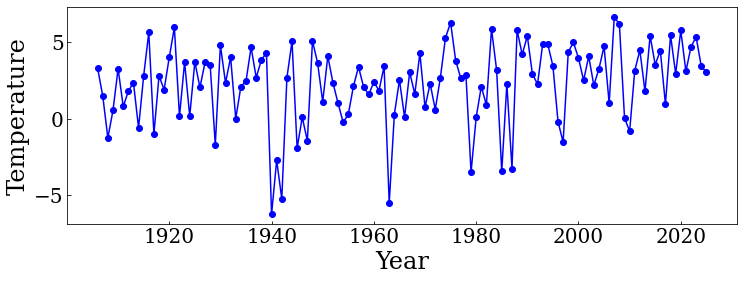

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df['YEAR'], df['Jan'], ls='solid', marker='o', color='blue')
plt.xlabel('Year') # Axes have labels!
plt.ylabel('Temperature')

### Inspect the data first
*The last row in the datafile is incomplete and may cause trouble. The entries for the future are not a number 'NaN' (see below) and I hope (but did not check) that these are ignored when calculating an average. This happens unless you run this notebook in January.*

This issue can be avoided by dropping a row of data. using a command like: 

df=df.drop(112) # drop row 112

or 

df=df[:-1] # drop the last row 

You should to inspect the end of the data using the df.tail() command. (df.head() checks the top of the file). After dropping a column it is advised to check the new dataframe, i.e. use 

df.tail()

In [6]:
df.tail()

,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
115,2021,3.080645,4.105862,6.355914,6.460556,11.37742,18.71334,18.06667,16.86344,15.85833,11.38548,6.548333,5.207527
116,2022,4.697312,6.382735,7.223656,9.233333,14.56398,17.44000,18.88280,20.62473,14.68389,13.30215,8.598889,3.819893
117,2023,5.323656,5.345321,6.987634,8.659444,13.71452,19.88944,18.31505,17.74839,17.87278,13.15000,7.435556,6.614516
118,2024,3.426344,8.036781,8.902688,10.823330,15.54516,16.02944,18.36236,19.56452,15.75278,11.95323,6.633333,5.517742
119,2025,3.027957,2.873443,-999.900000,-999.900000,-999.90000,-999.90000,-999.90000,-999.90000,-999.90000,-999.90000,-999.900000,-999.900000


In [7]:
df = df[:-1]  # I drop the last row to get rid of values -999.9
df.tail()

,YEAR,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
114,2020,5.759677,6.916667,6.780645,11.371670,13.27742,17.76889,17.11344,20.55807,15.32833,11.25000,8.572778,5.384946
115,2021,3.080645,4.105862,6.355914,6.460556,11.37742,18.71334,18.06667,16.86344,15.85833,11.38548,6.548333,5.207527
116,2022,4.697312,6.382735,7.223656,9.233333,14.56398,17.44000,18.88280,20.62473,14.68389,13.30215,8.598889,3.819893
117,2023,5.323656,5.345321,6.987634,8.659444,13.71452,19.88944,18.31505,17.74839,17.87278,13.15000,7.435556,6.614516
118,2024,3.426344,8.036781,8.902688,10.823330,15.54516,16.02944,18.36236,19.56452,15.75278,11.95323,6.633333,5.517742


## Checking the monthly temperatures

### a) Combine the data to obtain the average temperature and standard deviation for each month over the period 1906-now

As the earth revolves around the sun, the distance between earth and sun has a sinusoidal dependence on time due to the inclination of the rotation axis of the earth. 

### b) Construct a model and check if the average temperature per month can be described by a sinusoidal function by fitting the data to such a model. 

### c) What is the average temperature $T_{avg}$ in the Netherlands for the period 1906-now? Which month is the coldest month? Which month is the hottest?

### d) Is the data of KNMI well described by the simple sinusoidal model based on the value of $\chi^2$?

## Global warming: analyzing the average temperature in the Netherlands since 1906

A much more heated debate is the issue of global warming. For a more solid scientific basis for the effect I refer to online information http://climate.nasa.gov/. Let’s try to look at local warming using the data from KNMI.

### e) Calculate the average annual temperature by averaging over all 12 months for each year and plot this average annual temperature for the period 1906-now

If all is well you should get some noisy data, showing a gradual, slow increase with time. 

### f) Fit the data to a straight line and find the increase in average temperature in the Netherlands for the period 1906-now.

Consider the hypothesis that there is no measurable effect of local warming, assuming that the trend in the data is due to some random statistical fluctuations. 

### g) Test this hypothesis by constructing a model and looking at the goodness of fit.

*For a solid scientific discussion on the origin of the trend consider that the effect of greenhouse gasses in the atmosphere https://en.wikipedia.org/wiki/Greenhouse_gas and the fact that the solar activity varies over time https://en.wikipedia.org/wiki/Solar_cycle. Also consider that the average temperature in the Netherlands might be a very poor measure of the global average temperature.*